In [ ]:
#rohith vorsa id:rvorsa

In [ ]:
#1

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# loading the training data set
trnng_data = pd.read_csv('train.csv') 

# early study of exploratory data
print("rows in the training data:")
print(trnng_data.head())
print("\nData in training data:")
print(trnng_data.info())

# managing the missing values
print("\nNumber of missing values in the training data:")
print(trnng_data.isnull().sum())

# For numerical columns, using mean imputation to impute missing values.
imputer = SimpleImputer(strategy='mean')
numeric_cols_trnng = trnng_data.select_dtypes(include='number').columns  # Changed variable name to numeric_cols_trnng
trnng_data[numeric_cols_trnng] = imputer.fit_transform(trnng_data[numeric_cols_trnng])

# Encoding the target variable 
sgmnttn_encoder = LabelEncoder()
trnng_data['Encoded_Target'] = sgmnttn_encoder.fit_transform(trnng_data['Segmentation'])  # New line to encode target variable

# Changing the format of category variables to numerical
trnng_data_encoded = pd.get_dummies(trnng_data, columns=['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1'])

# For variables that are quickly encoded, replacing True/False with 1/0.
trnng_data_encoded.replace({True: 1, False: 0}, inplace=True)

# Separating the features and target variable
X_trnng_data = trnng_data_encoded.drop(columns=['Encoded_Target']) 
y_trnng_data = trnng_data_encoded['Encoded_Target'] 

# Loading the testing data
tstng_data = pd.read_csv('test.csv')  # Changed variable name to tstng_data

# For numeric columns in testing data, using mean imputation to impute missing values.
tstng_data[numeric_cols_trnng] = imputer.transform(tstng_data[numeric_cols_trnng])

# For testing data, converting category variables to numerical format.
tstng_data_encoded = pd.get_dummies(tstng_data, columns=['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1'])

# Making sure that training and testing data are encoded with categorical variables consistently.
for col in trnng_data_encoded.columns:
    if col not in tstng_data_encoded.columns:
        tstng_data_encoded[col] = 0

# In testing data, replacing true or false using 1/0 for quickly encoded variables.
tstng_data_encoded.replace({True: 1, False: 0}, inplace=True)

# Sorting columns in testing data so that they correspond with training data's order.
tstng_data_encoded = tstng_data_encoded[X_trnng_data.columns]

# Separating the features for testing data
X_tstng_data = tstng_data_encoded 

# Checking the initial few rows of X_trnng_data and y_trnng_data
print("\n rows of the feature set (1st few)(X_trnng_data):")
print(X_trnng_data.head())
print("\n rows of the target variable(1st few) (y_trnng_data):")
print(y_trnng_data.head())


C:\Users\Rohith\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


rows in the training data:
       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A  

Data in training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype

C:\Users\Rohith\AppData\Local\Temp\ipykernel_22424\385829066.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  trnng_data_encoded.replace({True: 1, False: 0}, inplace=True)
C:\Users\Rohith\AppData\Local\Temp\ipykernel_22424\385829066.py:52: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tstng_data_encoded.replace({True: 1, False: 0}, inplace=True)


In [ ]:
#2nd 

In [9]:
import numpy as np
import pandas as pd

class CustomNeuralNetwork:
    def __init__(self, cus_ip_sz, hddn_sz, out_sz, activation='sigmoid'):
        self.cus_ip_sz = cus_ip_sz
        self.hddn_sz = hddn_sz
        self.out_sz = out_sz
        
        # Setting up the first layer's weights and biases.
        self.W1 = np.random.randn(self.cus_ip_sz, self.hddn_sz)
        self.b1 = np.zeros((1, self.hddn_sz))
        
        # Setting up the second layer's weights and biases.
        self.W2 = np.random.randn(self.hddn_sz, self.out_sz)
        self.b2 = np.zeros((1, self.out_sz))
        
        # Configuring the activation function.
        if activation == 'sigmoid':
            self.activation = self.sigmoid
            self.activation_derivative = self.sigmoid_derivative
        elif activation == 'relu':
            self.activation = self.relu
            self.activation_derivative = self.relu_derivative
        else:
            raise ValueError("Activation function must be 'sigmoid' or 'relu'.")
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def relu(self, x):
        return np.maximum(0, x)
    
    def relu_derivative(self, x):
        return np.where(x <= 0, 0, 1)
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.activation(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2) 
        return self.a2
    
    def backward(self, X, y, lr):
        m = X.shape[0]
        
        # Calculating gradients
        az2 = self.a2 - y
        aw2 = np.dot(self.a1.T, az2) / m
        ab2 = np.sum(az2, axis=0, keepdims=True) / m
        az1 = np.dot(az2, self.W2.T) * self.activation_derivative(self.a1)
        aw1 = np.dot(X.T, az1) / m
        ab1 = np.sum(az1, axis=0, keepdims=True) / m
        
        # Updating the weights and biases
        self.W2 -= lr * aw2
        self.b2 -= lr * ab2
        self.W1 -= lr * aw1
        self.b1 -= lr * ab1
    
    def train(self, X, y, epochs=1000, lr=0.01, print_interval=100):
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Backward pass
            self.backward(X, y, lr)
            
            # Computing the print loss
            loss = self.loss(y, output)
            if epoch % print_interval == 0:
                print(f"Epoch {epoch}, Loss: {loss}")
    
    def loss(self, y_true, y_pred):
        m = y_true.shape[0]
        return -np.sum(y_true * np.log(y_pred + 1e-15)) / m
    
    def predict(self, X):
        return self.forward(X)

# Considering that custom_data and custom_labels represent preprocessed labels and features, respectively
custom_data = np.random.rand(100, 10) 
custom_labels = np.random.randint(0, 2, size=(100,))  
cus_ip_sz = custom_data.shape[1]
cus_out_sz = len(np.unique(custom_labels))  

# Building a neural network using sigmoid activation and training it.
sigmoid_nn_custom = CustomNeuralNetwork(cus_ip_sz, 64, cus_out_sz, activation='sigmoid')
sigmoid_nn_custom.train(custom_data, pd.get_dummies(custom_labels).values, epochs=1000, lr=0.01, print_interval=100)

# Building a neural network and training it using ReLU activation.
relu_nn_custom = CustomNeuralNetwork(cus_ip_sz, 64, cus_out_sz, activation='relu')
relu_nn_custom.train(custom_data, pd.get_dummies(custom_labels).values, epochs=1000, lr=0.01, print_interval=100)


Epoch 0, Loss: 5.256266360984073
Epoch 100, Loss: 0.8980466350074399
Epoch 200, Loss: 0.8178443713016378
Epoch 300, Loss: 0.7979927717051578
Epoch 400, Loss: 0.7810038409481186
Epoch 500, Loss: 0.765907316537444
Epoch 600, Loss: 0.7525047539532644
Epoch 700, Loss: 0.7406220285842282
Epoch 800, Loss: 0.7300984891997588
Epoch 900, Loss: 0.7207861489187457
Epoch 0, Loss: 6.131317582769343
Epoch 100, Loss: 1.0901213479780536
Epoch 200, Loss: 0.808129509748461
Epoch 300, Loss: 0.700878776901584
Epoch 400, Loss: 0.6467672830595028
Epoch 500, Loss: 0.6139174111680243
Epoch 600, Loss: 0.5850042553826102
Epoch 700, Loss: 0.5676614876783579
Epoch 800, Loss: 0.5535635453700706
Epoch 900, Loss: 0.5400777994969344


In [ ]:
#3rd question

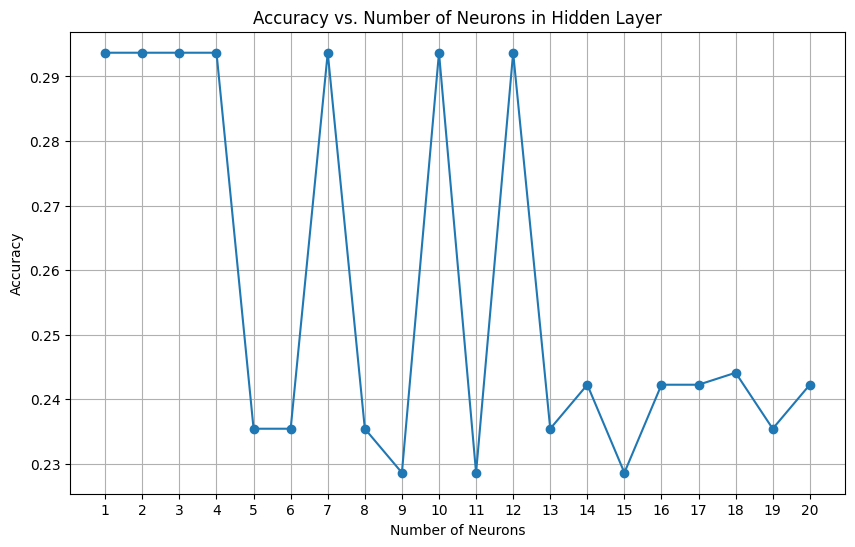

In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Loading the training data
training_data = pd.read_csv('train.csv') 

# Keeping the target variable apart from the other data.
trgt_v = training_data['Segmentation'] 

# Removing the DataFrame's target variable.
training_data.drop(columns=['Segmentation'], inplace=True)

# Managing missing values
imputer = SimpleImputer(strategy='mean')
nmrc_clmns = training_data.select_dtypes(include='number').columns 
training_data[nmrc_clmns] = imputer.fit_transform(training_data[nmrc_clmns])

# Encoding the categorical variables
ctgcl_clmns = training_data.select_dtypes(include='object').columns  
training_data_encoded = pd.get_dummies(training_data, columns=ctgcl_clmns)  

# Separate features
ftrsnvls = training_data_encoded  

# dividing the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(ftrsnvls, trgt_v, test_size=0.2, random_state=42) 
# Defining a function that uses a variable number of neurons to train the MLPClassifier.
def train_mlp(train_X, train_y, test_X, test_y, hddn_lyr_szs): 
    accrs = []
    for size in hddn_lyr_szs:
        mlp = MLPClassifier(hidden_layer_sizes=size, max_iter=1000, random_state=42)
        mlp.fit(train_X, train_y)
        acc = mlp.score(test_X, test_y)
        accrs.append(acc)
    return accrs

# Specifying a variety of neurons for the layers that are hidden.
hddn_lyr_szs = [(neurons,) * 2 for neurons in range(1, 21)]  # Varying from 1 to 20 neurons per layer

# Using different numbers of neurons to train the MLPClassifier.
accrs = train_mlp(train_X, train_y, test_X, test_y, hddn_lyr_szs)  # Adjusted function parameter names

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accrs, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Neurons in Hidden Layer')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()


In [ ]:
#4th question

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Launching the logistic regression model.
model = LogisticRegression(random_state=42)

# Training the logistic regression model
model.fit(train_X, train_y)

# Making a prediction using the test set.
predictions = model.predict(test_X)

# Computing the accuracy
accuracy = accuracy_score(test_y, predictions)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.44919454770755884


C:\Users\Rohith\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#5th question

In [31]:
!pip install --upgrade scikit-learn


C:\Users\Rohith\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acuracy for logistic regression Mdl: 0.4634448574969021
Acuracy for neural network Mdl: 0.23543990086741015


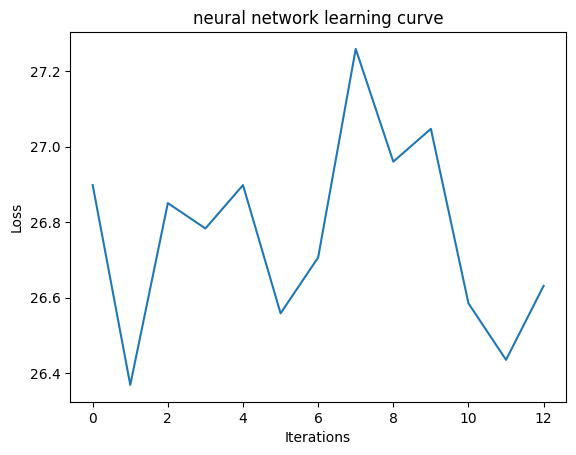

confusion matrix and classification report for log_reg:
[[136  17 115 123]
 [ 97  17 180  75]
 [ 66   4 257  53]
 [ 81   8  47 338]]
              precision    recall  f1-score   support

           A       0.36      0.35      0.35       391
           B       0.37      0.05      0.08       369
           C       0.43      0.68      0.53       380
           D       0.57      0.71      0.64       474

    accuracy                           0.46      1614
   macro avg       0.43      0.45      0.40      1614
weighted avg       0.44      0.46      0.41      1614

confusion matrix and classification report forneural network:
[[  0   0 391   0]
 [  0   0 369   0]
 [  0   0 380   0]
 [  0   0 474   0]]
              precision    recall  f1-score   support

           A       0.00      0.00      0.00       391
           B       0.00      0.00      0.00       369
           C       0.24      1.00      0.38       380
           D       0.00      0.00      0.00       474

    accuracy         

C:\Users\Rohith\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rohith\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rohith\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# loading the dataset
dt = pd.read_csv("train.csv")

# dividing the features and target variables
ftrs = dt.drop(columns=['Segmentation'])  
trgt = dt['Segmentation']  

# Encoding categorical featires
ncdr = LabelEncoder()  
for clmn in ftrs.select_dtypes(include=['object']).columns:
    ftrs[clmn] = ncdr.fit_transform(ftrs[clmn]) 


mpltr = SimpleImputer(strategy='mean')
ftrs_mpltd = mpltr.fit_transform(ftrs) 


X_trn, X_tst, y_trn, y_tst = train_test_split(ftrs_mpltd, trgt, test_size=0.2, random_state=42) 
lgtc_mdl = LogisticRegression(random_state=42)
lgtc_mdl.fit(X_trn, y_trn)

# Product using logstic regression model
y_prd_lgtc = lgtc_mdl.predict(X_tst)


ccrccy_lgtc = accuracy_score(y_tst, y_prd_lgtc)
print("Acuracy for logistic regression Mdl:", ccrccy_lgtc)


nn_mdl = MLPClassifier(random_state=42) 
nn_mdl.fit(X_trn, y_trn)


y_prd_nn = nn_mdl.predict(X_tst)


ccrccy_nn = accuracy_score(y_tst, y_prd_nn)
print("Acuracy for neural network Mdl:", ccrccy_nn)

#plotting the loss curve in neural network
plt.plot(nn_mdl.loss_curve_)
plt.title("neural network learning curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()


print("confusion matrix and classification report for log_reg:")
print(confusion_matrix(y_tst, y_prd_lgtc))
print(classification_report(y_tst, y_prd_lgtc))


print("confusion matrix and classification report forneural network:")
print(confusion_matrix(y_tst, y_prd_nn))
print(classification_report(y_tst, y_prd_nn))
